<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,29.868802,39.355113,-0.002912,79.221003,79.226381,-0.005378
1,0.0,1.0,20.024981,50.913149,-0.011559,80.926571,80.945491,-0.018920
2,0.0,2.0,61.385128,83.056952,-0.012879,154.429202,154.441915,-0.012713
3,0.0,3.0,72.043998,39.727048,0.001818,121.772864,121.760602,0.012262
4,0.0,4.0,45.939714,51.967152,0.030502,107.937368,107.906428,0.030940
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,80.890257,83.360624,-0.001821,174.249061,174.255535,-0.006474
29996,999.0,26.0,95.444523,67.359898,-0.017432,172.786988,172.807413,-0.020425
29997,999.0,27.0,89.141449,63.217922,0.018324,162.377695,162.360303,0.017392
29998,999.0,28.0,37.021946,94.703130,-0.003064,141.722013,141.725475,-0.003462


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    29.868802  39.355113 -0.002912   79.221003   79.226381 -0.005378
      1.0    20.024981  50.913149 -0.011559   80.926571   80.945491 -0.018920
      2.0    61.385128  83.056952 -0.012879  154.429202  154.441915 -0.012713
      3.0    72.043998  39.727048  0.001818  121.772864  121.760602  0.012262
      4.0    45.939714  51.967152  0.030502  107.937368  107.906428  0.030940
...                ...        ...       ...         ...         ...       ...
999.0 25.0   80.890257  83.360624 -0.001821  174.249061  174.255535 -0.006474
      26.0   95.444523  67.359898 -0.017432  172.786988  172.807413 -0.020425
      27.0   89.141449  63.217922  0.018324  162.377695  162.360303  0.017392
      28.0   37.021946  94.703130 -0.003064  141.722013  141.725475 -0.003462
      29.0   44.080948  56.227649 -0.014859  110.293737  110.300478 -0.006741

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    29.868802  39.355113 -0.002912   79.221003   79.226381 -0.005378
      1.0    20.024981  50.913149 -0.011559   80.926571   80.945491 -0.018920
      2.0    61.385128  83.056952 -0.012879  154.429202  154.441915 -0.012713
      3.0    72.043998  39.727048  0.001818  121.772864  121.760602  0.012262
      4.0    45.939714  51.967152  0.030502  107.937368  107.906428  0.030940
...                ...        ...       ...         ...         ...       ...
999.0 25.0   80.890257  83.360624 -0.001821  174.249061  174.255535 -0.006474
      26.0   95.444523  67.359898 -0.017432  172.786988  172.807413 -0.020425
      27.0   89.141449  63.217922  0.018324  162.377695  162.360303  0.017392
      28.0   37.021946  94.703130 -0.003064  141.722013  141.725475 -0.003462
      29.0   44.080948  56.227649 -0.014859  110.293737  110.300478 -0.006741

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,29.868802,39.355113,-0.002912,79.221003,79.226381,-0.005378
1,0.0,1.0,20.024981,50.913149,-0.011559,80.926571,80.945491,-0.018920
2,0.0,2.0,61.385128,83.056952,-0.012879,154.429202,154.441915,-0.012713
3,0.0,3.0,72.043998,39.727048,0.001818,121.772864,121.760602,0.012262
4,0.0,4.0,45.939714,51.967152,0.030502,107.937368,107.906428,0.030940
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,80.890257,83.360624,-0.001821,174.249061,174.255535,-0.006474
29996,999.0,26.0,95.444523,67.359898,-0.017432,172.786988,172.807413,-0.020425
29997,999.0,27.0,89.141449,63.217922,0.018324,162.377695,162.360303,0.017392
29998,999.0,28.0,37.021946,94.703130,-0.003064,141.722013,141.725475,-0.003462


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    29.868802  39.355113 -0.002912   79.221003   79.226381 -0.005378
      1.0    20.024981  50.913149 -0.011559   80.926571   80.945491 -0.018920
      2.0    61.385128  83.056952 -0.012879  154.429202  154.441915 -0.012713
      3.0    72.043998  39.727048  0.001818  121.772864  121.760602  0.012262
      4.0    45.939714  51.967152  0.030502  107.937368  107.906428  0.030940
...                ...        ...       ...         ...         ...       ...
999.0 25.0   80.890257  83.360624 -0.001821  174.249061  174.255535 -0.006474
      26.0   95.444523  67.359898 -0.017432  172.786988  172.807413 -0.020425
      27.0   89.141449  63.217922  0.018324  162.377695  162.360303  0.017392
      28.0   37.021946  94.703130 -0.003064  141.722013  141.725475 -0.003462
      29.0   44.080948  56.227649 -0.014859  110.293737  110.300478 -0.006741

[30000 rows x 6 columns]

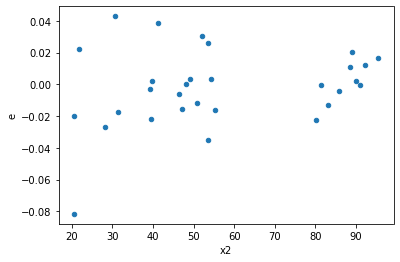

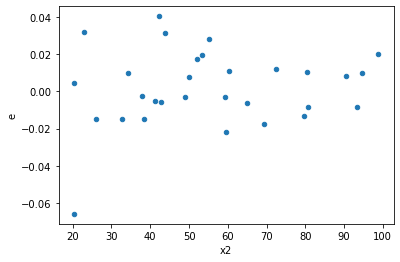

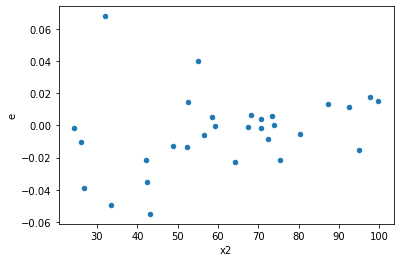

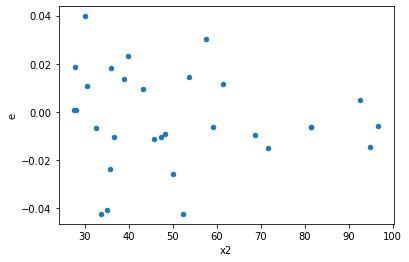

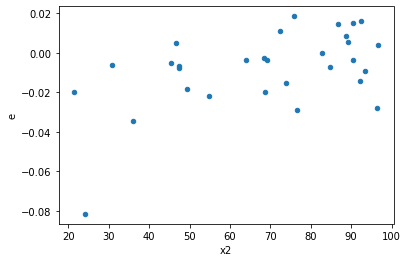

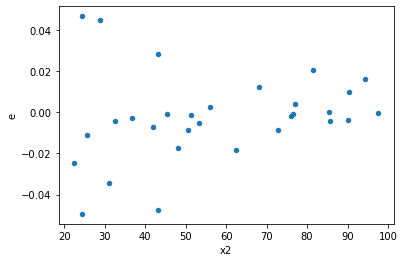

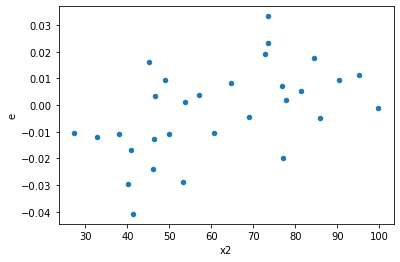

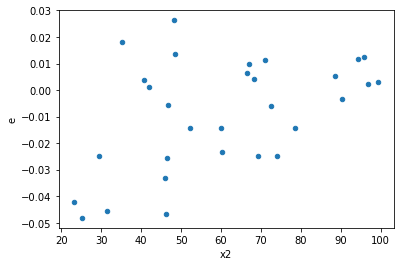

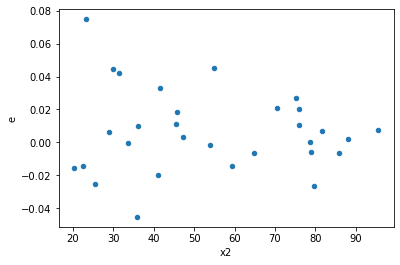

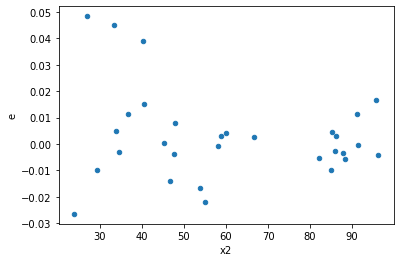

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,11.0,15.0,0.0025276642028396958,0.009489741421723801,0.0002297876548036087,0.00063264942811492,2.753191543974035,0.07068833170634203,0.964655834146829,0.03534416585317102,Reject001=1 : Homoscedasticity
1.0,11.0,15.0,0.003176440152154106,0.007190801761867894,0.0002887672865594642,0.0004793867841245263,1.660114585125656,0.35677836853464906,0.8216108157326755,0.17838918426732453,Reject001=1 : Homoscedasticity
6.0,12.0,14.0,0.0012986983448159376,0.00300256455988354,0.0001082248620679948,0.00021446889713453855,1.981697116876836,0.22270614642330377,0.8886469267883481,0.11135307321165189,Reject001=1 : Homoscedasticity
7.0,13.0,13.0,0.001794784438085682,0.007769710124982464,0.0001380603413912063,0.0005976700096140357,4.329049193935313,0.01278335420715071,0.9936083228964246,0.006391677103575355,Reject001=1 : Homoscedasticity
8.0,14.0,12.0,0.004130848416626438,0.01115176151817059,0.00029506060118760267,0.0009293134598475491,3.149568109422653,0.05341396946951882,0.9732930152652406,0.02670698473475941,Reject001=1 : Homoscedasticity
9.0,11.0,15.0,0.0005602862125236507,0.0069540644127096644,5.093511022942279e-05,0.0004636042941806443,9.101861016742085,0.00017357748852542265,0.9999132112557373,8.678874426271133e-05,Reject001=0 : Heteroscedasticity
10.0,11.0,15.0,0.0020313912314254027,0.019313422527356943,0.00018467193012958207,0.0012875615018237963,6.972155979094007,0.0008226214660960185,0.999588689266952,0.00041131073304800925,Reject001=0 : Heteroscedasticity
14.0,14.0,12.0,0.0022468753102350336,0.018664088094547678,0.00016049109358821668,0.0015553406745456397,9.691133880215727,0.00034560742027212044,0.9998271962898639,0.00017280371013606022,Reject001=0 : Heteroscedasticity
15.0,11.0,15.0,0.0009649119099581054,0.007577370947912462,8.771926454164595e-05,0.0005051580631941641,5.758804133091349,0.0023509287952532265,0.9988245356023734,0.0011754643976266133,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,15.0,0.0025276642028396958,0.009489741421723801,0.0002297876548036087,0.00063264942811492,2.753191543974035,0.07068833170634203,Reject001=1 : Homoscedasticity
1.0,11.0,15.0,0.003176440152154106,0.007190801761867894,0.0002887672865594642,0.0004793867841245263,1.660114585125656,0.35677836853464906,Reject001=1 : Homoscedasticity
2.0,16.0,10.0,0.014009416761827568,0.0018659027606154708,0.000875588547614223,0.0001865902760615471,0.213102691406783,0.006248179296622292,Reject001=0 : Heteroscedasticity
3.0,13.0,13.0,0.006075100759022438,0.004237461606621004,0.00046731544300172595,0.0003259585851246926,0.6975129754560427,0.5251753871387004,Reject001=1 : Homoscedasticity
4.0,8.0,18.0,0.0029472850003271524,0.0028043401107392045,0.00036841062504089405,0.0001557966728188447,0.4228886525776803,0.21561592338832178,Reject001=1 : Homoscedasticity
5.0,11.0,15.0,0.0068394672851902795,0.00563902889785689,0.0006217697531991163,0.00037593525985712604,0.6046213375978359,0.40389092013251315,Reject001=1 : Homoscedasticity
6.0,12.0,14.0,0.0012986983448159376,0.00300256455988354,0.0001082248620679948,0.00021446889713453855,1.981697116876836,0.22270614642330377,Reject001=1 : Homoscedasticity
7.0,13.0,13.0,0.001794784438085682,0.007769710124982464,0.0001380603413912063,0.0005976700096140357,4.329049193935313,0.01278335420715071,Reject001=1 : Homoscedasticity
8.0,14.0,12.0,0.004130848416626438,0.01115176151817059,0.00029506060118760267,0.0009293134598475491,3.149568109422653,0.05341396946951882,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      661
Reject001=0 : Heteroscedasticity    339
Name: Result_test, dtype: int64